# Homework 2 - Classification

In this exercise you will use scikit-learn, a popular machine learning package in python to train and tune a classifier. A particularly useful feature is that all classifiers (and linear models) are called using the same API, so it is easy to test between different models (see the sklearn-intro notebook for examples). So in this exercise we will a classification technique (logistic regression) that is representative of methods and challenges you will encounter when using any classification method.


## Dataset 1
The dataset you will be using is default of credit card clients Data Set.
There are two data files: "CreditDefault_training.csv" and "CreditDefault_Xtest.csv"
Both files have the following fields, except the label ("default.payment.next.month") which is not available in "CreditDefault_Xtest.csv"

Features:

1 - LIMIT_BAL:  Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. <br>
2 - SEX: (1 = male; 2 = female) <br>
3- EDUCATION: (six levels: 1,2,3,4,5,6) <br>
4 - MARRIAGE: (1 = married; 2 = single; 3 = others) <br>
5 - AGE <br>

From "PAY_1" to "PAY_6": History of past payment (Repayment status: -2: Balance paid in full and no transactions this period; -1: Balance paid in full, but account has a positive balance at end of period due to recent transactions for which payment has not yet come due; 0: Customer paid the minimum due amount, but not the entire balance; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.)<br>
6 - PAY_1: the repayment status in September, 2005 <br>
7 - PAY_2: the repayment status in August, 2005 <br>
...<br>
11 - PAY_6: the repayment status in April, 2005 <br>

From "BILL_AMT1" to "BILL_AMT6": Amount of bill statement (NT dollar).<br>
12 - BILL_AMT1 : amount of bill statement in September, 2005<br>
13 - BILL_AMT2 : amount of bill statement in August, 2005<br>
...<br>
17 - BILL_AMT6 : amount of bill statement in April, 2005<br>

From "PAY_AMT1" to "PAY_AMT6": Amount of previous payment (NT dollar).<br>
18 - PAY_AMT1 : amount paid in September, 2005<br>
19 - PAY_AMT2 : amount paid in August, 2005<br>
...<br>
23 - PAY_AMT6 : amount paid in April, 2005<br>

Target:

default.payment.next.month: binary variable, whether default payment (Yes = 1, No = 0)


Training dataset, "CreditDefault_training.csv", contains 3985 rows and 24 columns. This is the training set containing both of the features and the target.
Test dataset, "CreditDefault_Xtest.csv", contains 1000 rows and 23 columns. This is the test set which only contains the features.

Prediction task is to determine whether there's credit default for a person.



In [ ]:
import numpy as np
import pandas as pd
from google.colab import files
import io

In [ ]:
# Load your training data set
uploaded1 = files.upload()

Saving CreditDefault_training.csv to CreditDefault_training.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded1['CreditDefault_training.csv']))

In [ ]:
# Split training data into X and y
X = df.loc[:,df.columns != 'default.payment.next.month']
y = df['default.payment.next.month']

## Standardization and One-hot Encoding

Standardize the continuous features and convert categorical variables ('SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6') into dummy variables.<br>
Note the situation where not all repayment status categories (-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9) necessarily appear in the training dataset for variables 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'.

Standardization and one-hot encoding for training set and test set

In [ ]:
# Load test data set
uploaded2 = files.upload()

Saving CreditDefault_Xtest.csv to CreditDefault_Xtest.csv


In [ ]:
df_test = pd.read_csv(io.BytesIO(uploaded2['CreditDefault_Xtest.csv']))

In [ ]:
# Standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Standardizing the training set
# Separating categorical variables before standardizing the numerical variables
df_temp = X[['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
X.drop(['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'], axis = 1, inplace = True)
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

# Concatenating the standandardized numerical variables with the categorical variables
X = pd.concat([X, df_temp], axis = 1)

# Standardizing the test set
# Separating categorical variables before standardizing the numerical variables
df_temp = df_test[['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
df_test.drop(['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'], axis = 1, inplace = True)
df_test = pd.DataFrame(scaler.transform(df_test), columns = df_test.columns)

# Concatenating the standandardized numerical variables with the categorical variables
df_test = pd.concat([df_test, df_temp], axis = 1)

<ipython-input-7-6233829a568c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'], axis = 1, inplace = True)


The columns PAY_1 to PAY_6 are categorical variables with 12 possible values for each. However, on observation of the training and test data sets, it was found that every variable does not take each of the possible values. Therefore, we separately encode the other categorical variables first and then encode the columns PAY_1 to PAY_6 while catering to the entire range of possible values they can take.

In [ ]:
# One-hot encoding

from sklearn.preprocessing import OneHotEncoder

# Encoding SEX, EDUCATION, MARRIAGE columns in the training set
enc1 = OneHotEncoder(sparse = False)
X1 = pd.DataFrame(enc1.fit_transform(X[['SEX', 'EDUCATION', 'MARRIAGE']]), columns = enc1.get_feature_names_out(['SEX', 'EDUCATION', 'MARRIAGE']))
X.drop(['SEX', 'EDUCATION', 'MARRIAGE'], axis = 1, inplace = True)
X = pd.concat([X, X1], axis = 1)

# Encoding SEX, EDUCATION, MARRIAGE columns in the test set
X1 = pd.DataFrame(enc1.transform(df_test[['SEX', 'EDUCATION', 'MARRIAGE']]), columns = enc1.get_feature_names_out(['SEX', 'EDUCATION', 'MARRIAGE']))
df_test.drop(['SEX', 'EDUCATION', 'MARRIAGE'], axis = 1, inplace = True)
df_test = pd.concat([df_test, X1], axis = 1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


**One hot encoding the "PAY" columns**

After analyzing the "Pay" columns we found that there are some missing values in the column. So we used the categories arguement in the OneHotEncoder to let the encoder know all the possible values for each column so that it creates a column with all zeros if a particular categorical values is not present in the column.

In [ ]:
# Encoding the other categorical variables PAY_1 to PAY_6

# Creating a numpy array with all possible values for a 'PAY' column
cat = np.array([-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
all_cat = []

# Creating a list of 6 numpy arrays - one for each 'PAY' column containing all the possible values
for i in range(6):
  all_cat.append(cat)

# Encoding the training set for PAY_1 to PAY_6 variables
enc2 = OneHotEncoder(sparse = False, categories = all_cat)
X2 = pd.DataFrame(enc2.fit_transform(X[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]), columns = enc2.get_feature_names_out(['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']))
X.drop(['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'], axis = 1, inplace = True)
X = pd.concat([X, X2], axis = 1)

# Encoding the test set for PAY_1 to PAY_6 variables
X2 = pd.DataFrame(enc2.transform(df_test[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]), columns = enc2.get_feature_names_out(['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']))
df_test.drop(['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'], axis = 1, inplace = True)
df_test = pd.concat([df_test, X2], axis = 1)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


**Splitting training data into training and validation set (70:30 ratio) (the code has been provided)**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_val.reset_index(inplace = True, drop = True)
y_val.reset_index(inplace = True, drop = True)

Print the shape of X_train, y_train, X_val

In [ ]:
print(X_train.shape, y_train.shape, X_val.shape)

(2789, 97) (2789,) (1196, 97)


## Logistic Regression

As previously mentioned, the scikit-learn classification API makes it easy to train a classifier.


Use LogisticRegression from sklearn.linear_model to make a logistic regression classifier.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# First, initialize the classifier with default parameters
# then fit the classifier on training data and labels

model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# If there is any ConvergenceWarning, increase the number of iterations. (Let max_iter = 200)

model = LogisticRegression(max_iter = 200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [ ]:
# predict the output for validation dataset

y_val_pred = model.predict(X_val)

Implement my_precision(), my_recall(), my_accuracy() by yourselves

In [ ]:
# Function for calculating precision
# TP/(TP+FP)
def my_precision(y, y_preds):
  tp = 0
  fp = 0

  for i in range(len(y)):
    if y_preds[i] == 1:
      if y[i] == 1:
        tp = tp + 1
      else:
        fp = fp + 1

  if (tp + fp) == 0:
    return 0

  p = tp/(tp + fp)
  return p

# Function for calculating recall
# TP/(TP+FN)
def my_recall(y, y_preds):
  tp = 0
  fn = 0

  for i in range(len(y)):
    if y[i] == 1:
      if y_preds[i] == 1:
        tp = tp + 1
      else:
        fn = fn + 1

  if (tp + fn) == 0:
    return 0

  r = tp/(tp + fn)
  return r

# Function for calculating accuracy
# (TP+TN)/(TP+FP+FN+TN)
def my_accuracy(y, y_preds):

  tp = 0
  tn = 0

  for i in range(len(y)):
    if y[i] == 1:
      if y_preds[i] == 1:
        tp = tp + 1
    else:
      if y_preds[i] == 0:
        tn = tn + 1

  a = (tp + tn)/(len(y))
  return a

Use your above functions to compute precision, recall, and accuracy of your model on validation set:

In [ ]:
print(f'Precision: {my_precision(y_val, y_val_pred)}')
print(f'Recall: {my_recall(y_val, y_val_pred)}')
print(f'Accuracy: {my_accuracy(y_val, y_val_pred)}')

Precision: 0.6610169491525424
Recall: 0.43333333333333335
Accuracy: 0.8219063545150501


Q. Accuracy<br>
Ans - 82.19 %

Q. Precision<br>
Ans - 66.10 %

Q. Recall<br>
Ans - 43.33 %

Q. Which metric (accuracy, precision, recall) is more appropriate and in what cases? Will there be scenarios where it is better to use precision than accuracy? Explain. <br>
Ans -

1). Precision focuses on the accuracy of positive predictions. It is more appropriate when the cost of false positives is high. High precision indicates that the model is accurate in its positive prediction.

2). Accuracy represents the overall correctness of the model. It is suitable when the class distribution is approximately equal. It often works well when the cost of false positives and false negatives are roughly equal. However, this metric might be misleading when the dataset is imbalanced.

3). Recall represents the true positive rate also known as sensitivity. This metric is important when the cost of false negatives is high. However, this metric does not consider false positives.


Q. Which metric is suitable in this case? <br>
Ans -
In this case, we will use recall because we want to capture as many defaults as possible. The false positive rate might be high but we do not want to miss a true value.

### ROC curve

Use roc_Curve from sklearn.metrics and use matplotlib.pyplot to plot the ROC curve. Use validation set to make predictions and to draw ROC curve.

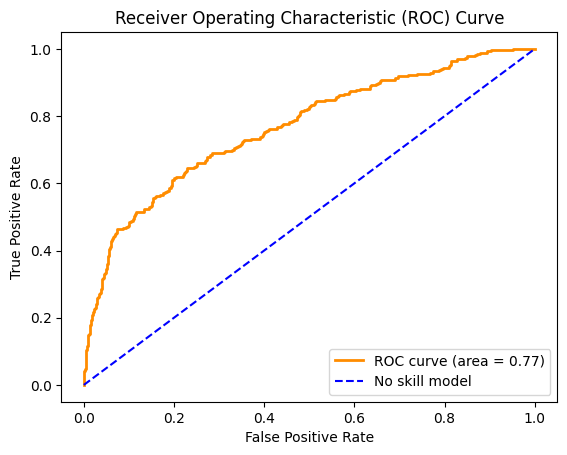

In [ ]:
# Plot the ROC curve by giving appropriate names for title and axes.
from sklearn.metrics import roc_curve, auc
import sklearn.metrics as metrics

y_val_prob = model.predict_proba(X_val)[:,1]

# Compute ROC curve and ROC area
fpr, tpr, threshold = roc_curve(y_val, y_val_prob)
roc_auc = auc(fpr,tpr)

# Plotting the ROC curve
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1], [0,1], color = 'blue', linestyle = '--', label = 'No skill model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Q. What is the AUC obtained?<br>
Ans - 0.77

## Hyperparameters

"Model tuning" refers to model adjustments to better fit the data, which is separate from "fitting" or "training" the model.


Build a model with hyperparameter 'C' set to 0.1 and penalty set to 'l1'. Make predictions on validation set and compute accuracy, precision and recall.

In [ ]:
model = LogisticRegression(C = 0.1, penalty = 'l1', solver = 'liblinear')
model.fit(X_train, y_train)
y_val_pred = model.predict(X_val)

print(f'Precision: {my_precision(y_val, y_val_pred)}')
print(f'Recall: {my_recall(y_val, y_val_pred)}')
print(f'Accuracy: {my_accuracy(y_val, y_val_pred)}')

Precision: 0.6804733727810651
Recall: 0.42592592592592593
Accuracy: 0.8252508361204013


Build a model with hyperparameter 'C' set to 0.5 and penalty set to 'l1'. Make predictions on validation set and compute accuracy, precision and recall.

In [ ]:
model = LogisticRegression(C = 0.5, penalty = 'l1', solver = 'liblinear')
model.fit(X_train, y_train)
y_val_pred = model.predict(X_val)

print(f'Precision: {my_precision(y_val, y_val_pred)}')
print(f'Recall: {my_recall(y_val, y_val_pred)}')
print(f'Accuracy: {my_accuracy(y_val, y_val_pred)}')

Precision: 0.6685714285714286
Recall: 0.43333333333333335
Accuracy: 0.8235785953177257


Build a model with hyperparameter 'C' set to 0.1 and penalty set to 'l2'. Make predictions on validation set and compute accuracy, precision and recall.

In [ ]:
model = LogisticRegression(C = 0.1, penalty = 'l2', solver = 'liblinear')
model.fit(X_train, y_train)
y_val_pred = model.predict(X_val)

print(f'Precision: {my_precision(y_val, y_val_pred)}')
print(f'Recall: {my_recall(y_val, y_val_pred)}')
print(f'Accuracy: {my_accuracy(y_val, y_val_pred)}')

Precision: 0.6627906976744186
Recall: 0.4222222222222222
Accuracy: 0.8210702341137124


Build a model with hyperparameter 'C' set to 0.5 and penalty set to 'l2'. Make predictions on validation set and compute accuracy, precision and recall. (Try to use a different solver or increase the number of iterations if there is a ConvergenceWarning)

In [ ]:
model = LogisticRegression(C = 0.5, penalty = 'l2', solver = 'liblinear')
model.fit(X_train, y_train)
y_val_pred = model.predict(X_val)

print(f'Precision: {my_precision(y_val, y_val_pred)}')
print(f'Recall: {my_recall(y_val, y_val_pred)}')
print(f'Accuracy: {my_accuracy(y_val, y_val_pred)}')

Precision: 0.6647727272727273
Recall: 0.43333333333333335
Accuracy: 0.822742474916388


Q. Which of the above models is better?<br>
Ans- The best model is C = 0.5, penalty = 'l1', solver = 'liblinear'. We first checked the recall for the four models and shortlisted two models with same (highest) recall. Then we chose the one with highest precision because the precision and recall tradeoff is lower.

# Test set

You have worked on training and validation dataset so far, but test data does not include the labels. Choose the best hyperparameter values as seen in previous section and build a model. Use this model to make predictions on test set.

In [ ]:
# Construct your final logistic regression using the best hyperparameters obtained above (C and penalty)
model = LogisticRegression(C = 0.5, penalty = 'l1', solver = 'liblinear')
model.fit(X_train, y_train)

# return the prediction as y_pred
y_pred = model.predict(df_test)

# Dataset 2
## Heart Disease Dataset Description

The Heart Disease Dataset contains a number of variables that can be used to predict the presence of heart disease in patients. Each attribute potentially contributes information that could be used to determine heart disease risk.

### Dataset Features:

- **Age**: The patient's age in years.
- **Sex**: The patient's sex (1 = male, 0 = female).
- **Chest Pain Type**: Type of chest pain experienced (values ranging from 1 to 4).
- **Resting Blood Pressure**: Resting blood pressure in mm Hg on admission to the hospital.
- **Serum Cholestrol**: Serum cholesterol in mg/dl.
- **Fasting Blood Sugar**: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false).
- **Resting Electrocardiographic Results**: Resting electrocardiographic results (values 0, 1, 2).
- **Maximum Heart Rate Achieved**: Maximum heart rate achieved during thallium stress test.
- **Exercise Induced Angina**: Exercise-induced angina (1 = yes; 0 = no).
- **ST Depression**: ST depression induced by exercise relative to rest.
- **Slope of the Peak Exercise ST Segment**: The slope of the peak exercise ST segment.
- **Number of Major Vessels**: Number of major vessels colored by fluoroscopy (0-3).
- **Thal**: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversible defect).

### Target Variable:

- **Heart Disease Presence**: The presence of heart disease (0 = no, 1 = yes).




In [ ]:
# Load the data set
!pip install ucimlrepo

from ucimlrepo import fetch_ucirepo
import pandas as pd

# Fetch dataset
heart_disease = fetch_ucirepo(id=45)

# Data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# Convert the target variable to binary
# 0 indicates no disease, 1 indicates any level of disease
y_binary = np.where(y == 0, 0, 1)
y_binary_series = pd.Series(y_binary.reshape(-1), name='HeartDisease')

# Now, X contains the features and y_binary contains the binary target
print(X.head())
print(y_binary_series.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  
0  0.0   6.0  
1  3.0   3.0  
2  2.0   7.0  
3  0.0   3.0  
4  0.0   3.0  
0    0
1    1
2    1
3    0
4    0
Name: HeartDisease, dtype: int64


In [ ]:
# Handling missing values (ex- by removing rows with missing data)
X_cleaned = X.dropna()
y_cleaned = y_binary_series[X_cleaned.index]

print("Cleaned X:")
print(X_cleaned.shape)
print("Cleaned y:")
print(y_cleaned.shape)

# Since 'y' (targets) do not have missing values, they can be used as is
# However, ensure that the rows in 'y' correspond to the rows in the cleaned 'X'

Cleaned X:
(297, 13)
Cleaned y:
(297,)


Data preprocessing (Standardize the features, one-hot encoding, lable encoding)

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Identify numerical and categorical columns
numerical_cols = X_cleaned[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'exang', 'fbs', 'sex']]
categorical_cols = X_cleaned[['cp', 'restecg', 'slope', 'ca', 'thal']]

# Applying One-hot Encoding
encoder = OneHotEncoder(sparse=False)
categorical_encoded = encoder.fit_transform(categorical_cols)

# Convert to DataFrame
categorical_encoded_df = pd.DataFrame(categorical_encoded, columns=encoder.get_feature_names_out(categorical_cols.columns))

# Applying StandardScaler
scaler = StandardScaler()
numerical_scaled = scaler.fit_transform(numerical_cols)

# Convert to DataFrame
numerical_scaled_df = pd.DataFrame(numerical_scaled, columns=numerical_cols.columns)

# Resetting index to align the dataframes before combining
categorical_encoded_df.reset_index(drop=True, inplace=True)
numerical_scaled_df.reset_index(drop=True, inplace=True)

# Combining encoded categorical data and scaled numerical data
combined_df = pd.concat([numerical_scaled_df, categorical_encoded_df], axis=1)

# Change the feature variables
X = combined_df
y = y_cleaned

# Display Processed X and y
print(X.head())
print(y.head())

        age  trestbps      chol   thalach   oldpeak     exang       fbs  \
0  0.936181  0.750380 -0.276443  0.017494  1.068965 -0.696419  2.430427   
1  1.378929  1.596266  0.744555 -1.816334  0.381773  1.435916 -0.411450   
2  1.378929 -0.659431 -0.353500 -0.899420  1.326662  1.435916 -0.411450   
3 -1.941680 -0.095506  0.051047  1.633010  2.099753 -0.696419 -0.411450   
4 -1.498933 -0.095506 -0.835103  0.978071  0.295874 -0.696419 -0.411450   

        sex  cp_1  cp_2  ...  slope_1  slope_2  slope_3  ca_0.0  ca_1.0  \
0  0.691095   1.0   0.0  ...      0.0      0.0      1.0     1.0     0.0   
1  0.691095   0.0   0.0  ...      0.0      1.0      0.0     0.0     0.0   
2  0.691095   0.0   0.0  ...      0.0      1.0      0.0     0.0     0.0   
3  0.691095   0.0   0.0  ...      0.0      0.0      1.0     1.0     0.0   
4 -1.446980   0.0   1.0  ...      1.0      0.0      0.0     1.0     0.0   

   ca_2.0  ca_3.0  thal_3.0  thal_6.0  thal_7.0  
0     0.0     0.0       0.0       1.0       0.0 

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Splitting training data into training and validation set (the code has been provided)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state=20)

In [ ]:
y_train.reset_index(inplace = True, drop = True)
y_val.reset_index(inplace = True, drop = True)

### Decision Tree
From sklearn.tree use DecisionTreeClassifier to build a classification model with default parameters.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
### Fit the classifier on the training data
# Please set random_state=30

clf = DecisionTreeClassifier(random_state=30)
clf = clf.fit(X_train, y_train)

In [ ]:
### Make predictions on the training data
y_pred = clf.predict(X_train)

Print accuracy, precision and recall for the predictions made on the training data.

In [ ]:
# Print accuracy, precision and recall for the predictions made on the training data.
print("Accuracy on training data:", my_accuracy(y_train, y_pred))
print("Precision on training data:", my_precision(y_train, y_pred))
print("Recall on training data:", my_recall(y_train, y_pred))

Accuracy on training data: 1.0
Precision on training data: 1.0
Recall on training data: 1.0


In [ ]:
### Make predictions on the validation data
y_pred_vali = clf.predict(X_val)

Print accuracy, prediction and recall for the predictions made on the validation data.

In [ ]:
print("Accuracy on validation data:", my_accuracy(y_val, y_pred_vali))
print("Precision on validation data:", my_precision(y_val, y_pred_vali))
print("Recall on validation data:", my_recall(y_val, y_pred_vali))

Accuracy on validation data: 0.7222222222222222
Precision on validation data: 0.6511627906976745
Recall on validation data: 0.7368421052631579


Plot ROC curve and obtain AUC for predictions on the validation data.

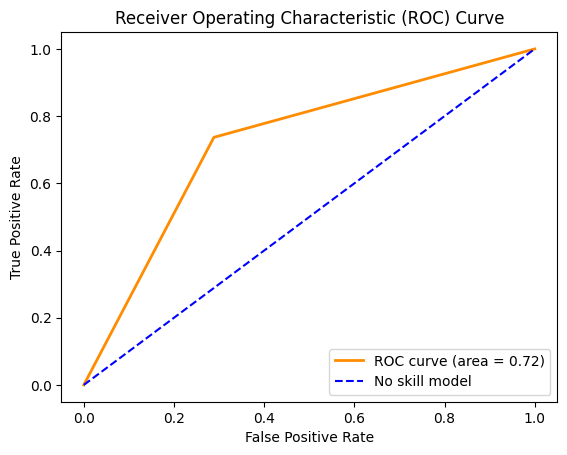

In [ ]:
# Plot the ROC curve by giving appropriate names for title and axes.
from sklearn.metrics import roc_curve, auc
import sklearn.metrics as metrics

y_val_prob = clf.predict_proba(X_val)[:,1]

# Compute ROC curve and ROC area
fpr, tpr, threshold = roc_curve(y_val, y_val_prob)
roc_auc = auc(fpr,tpr)

# Plotting the ROC curve
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1], [0,1], color = 'blue', linestyle = '--', label = 'No skill model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Q. Based on the scores for training set and validation set, explain the performance of the above model in terms of bias and variance.<br>

Ans - Since we have perfect (100%) accuracy, precision and recall on the training dataset, our model has no bias. However, the variance is high because the values of the metrics are much less on the validation set.

### Random Forest


Decision Trees have low predictive power compared to other methods due to high variance. Random Forest increases prediction power at the expense of decreased interpretability.


From sklearn.ensemble use RandomForestClassifier to build a classification model with default parameters.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
### Fit the classifier on the training data
# Please set random_state=30

clf_rf = RandomForestClassifier(random_state=30)
clf_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=30)

In [ ]:
### Make predictions on the training data
y_pred = clf_rf.predict(X_train)

Print accuracy, precision and recall for the predictions made on the training data.

In [ ]:
print("Accuracy on training data:", my_accuracy(y_train, y_pred))
print("Precision on training data:", my_precision(y_train, y_pred))
print("Recall on training data:", my_recall(y_train, y_pred))

Accuracy on training data: 1.0
Precision on training data: 1.0
Recall on training data: 1.0


In [ ]:
### Make predictions on the validation data
y_pred_val = clf_rf.predict(X_val)

Print accuracy, prediction and recall for the predictions made on the validation data.

In [ ]:
print("Accuracy on validation data:", my_accuracy(y_val, y_pred_val))
print("Precision on validation data:", my_precision(y_val, y_pred_val))
print("Recall on validation data:", my_recall(y_val, y_pred_val))

Accuracy on validation data: 0.8444444444444444
Precision on validation data: 0.7857142857142857
Recall on validation data: 0.868421052631579


Plot ROC curve and obtain AUC for the validation predictions

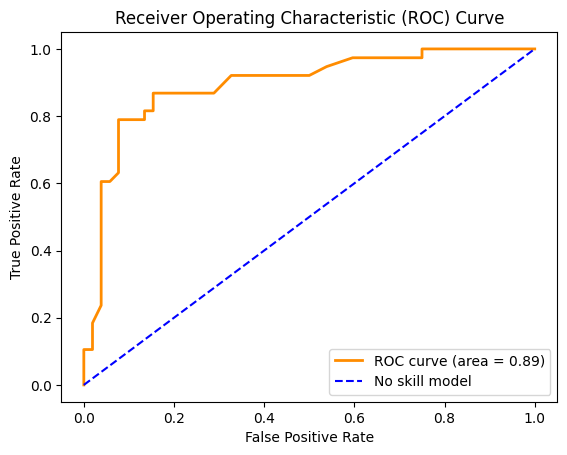

In [ ]:
# Plot the ROC curve by giving appropriate names for title and axes.
from sklearn.metrics import roc_curve, auc
import sklearn.metrics as metrics

y_val_prob = clf_rf.predict_proba(X_val)[:,1]

# Compute ROC curve and ROC area
fpr, tpr, threshold = roc_curve(y_val, y_val_prob)
roc_auc = auc(fpr,tpr)

# Plotting the ROC curve
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1], [0,1], color = 'blue', linestyle = '--', label = 'No skill model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Q. Based on the scores for training set and validation set, explain the performance of the above model in terms of bias and variance. Is the Random Forest model better or worse than the Decision Tree model? Explain why you think the performance may have improved or deteriorated.

Ans- The bias is low and the variance is high for the random forest for the same reasons as for the decision tree model. However, the random forest is better than the decision tree because the metric values on validation set are higher for the random forest model. Random Forest performs better than a single Decision Tree because it mitigates overfitting by aggregating predictions from multiple trees trained on different subsets of the data, leading to a more robust and generalized model that has lower variance.

## Hyperparameters

"Model tuning" refers to model adjustments to better fit the data, which is separate from "fitting" or "training" the model.

There are aspects of some models that are user specified. For example, when using a random forest (which is basically an ensemble of decision trees), it is probably a good idea to choose the right number of underlying trees. Too many and the model might overfit, and too few and the model might not be able to properly learn the data. Parameters such as these are referred to as "hyperparameters" or "free parameters", as the values for these are determined by the user and not the algorithm.

A quick and efficient way to optimize hyperparameters is to perform Grid Search over different values of the parameters.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# In the below dictionary, fill in the list of values that you want to try out for each parameter
# Refer to the descriptions in sklearn.ensemble.RandomForestClassifier's doc to understand what the parameters depict

param_grid = {
    'max_depth': [10, 20, 30, None],
    'max_features': ['sqrt', 'log2', None],
    'min_samples_leaf': [1, 7, 9],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [100, 200, 500]
}

In [ ]:
rf = RandomForestClassifier(random_state=30)

In [ ]:
grid_search = GridSearchCV(estimator = rf, scoring='recall', param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
### Fit on the training data with all sets of parameters.
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 324 candidates, totalling 972 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=30), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, None],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 7, 9],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500]},
             scoring='recall', verbose=2)

Display the parameters of the best model.

In [ ]:
# Print the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}


In [ ]:
# Print the best score
best_score = grid_search.best_score_
print("Best Score:", best_score)

Best Score: 0.8181818181818182


In [ ]:
### Using the best model, do the following:
### Make predictions on the training set and display accuracy, precision and recall.
bestModel = grid_search.best_estimator_
best_pred = bestModel.predict(X_train)

print(f'Accuracy of best model on training set: {my_accuracy(y_train, best_pred)}')
print(f'Precision of best model on training set: {my_precision(y_train, best_pred)}')
print(f'Recall of best model on training set: {my_recall(y_train, best_pred)}')

Accuracy of best model on training set: 0.9951690821256038
Precision of best model on training set: 1.0
Recall of best model on training set: 0.98989898989899


In [ ]:
### Make predictions on the validation set and display accuracy, precision and recall.
best_predVal = bestModel.predict(X_val)

print(f'Accuracy of best model on validation set: {my_accuracy(y_val, best_predVal)}')
print(f'Precision of best model on validation set: {my_precision(y_val, best_predVal)}')
print(f'Recall of best model on validation set: {my_recall(y_val, best_predVal)}')

Accuracy of best model on validation set: 0.8444444444444444
Precision of best model on validation set: 0.7857142857142857
Recall of best model on validation set: 0.868421052631579


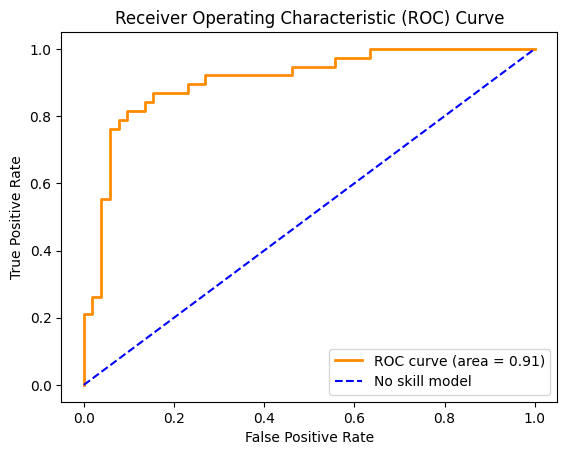

In [ ]:
# Plot the ROC curve by giving appropriate names for title and axes.
from sklearn.metrics import roc_curve, auc
import sklearn.metrics as metrics

y_val_prob = bestModel.predict_proba(X_val)[:,1]

# Compute ROC curve and ROC area
fpr, tpr, threshold = roc_curve(y_val, y_val_prob)
roc_auc = auc(fpr,tpr)

# Plotting the ROC curve
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1], [0,1], color = 'blue', linestyle = '--', label = 'No skill model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


### Individual student contribution

**Yunxiang (Alice) Zhang:**

**Prakwan Manem:**

**Sen (Jason) Yang:** Decision Tree

**Hamza Shahab Shafqat:** Random Forest

**Linpeng (Larry) Chen:** Hyperparameter Tuning (Random Forest)


All of us checked and contributed to each other's portion of the exercise.